<a href="https://colab.research.google.com/github/CHOOSLA/Self_Studying_of_Machine-Learning_and_Deep-Learning/blob/main/Chapter_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####################################
#####텍스트를 위한 인공 신경망######
####################################


#순차데이터
#순차데이터는 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터를 말한다.

#지금까지 우리가 보았던 데이터는 순서와는 상관이 없었다.
#순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요합니다.
#완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다.


#이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망은 **피드포워드신경망**이라고 한다. FFNN
#이전 장에서 배웠던 완전 연결 신경망과 합성곱 신경망이 모두 피트포워드 신경망에 속한다.

#신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는 데 재사용하기 위해서는 순환 신경망을 써야된다.


##순환신경망
#RNN은 일반적인 완전 연결 신경망과 거의 비슷합니다.
#완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리를 추가한다ㅏ

#뉴런의 출력이 다시 자기 자신으로 전달됩니다.

#샘플을 처리하는 한 단계를 **타임스텝**이라고 한다.

#순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래될수록 순환되는 정보는 희미해진다.

#순환 신경망에서는 특별히 층을 **셀**이라고 한다.
#한 셀에는 여러개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 표현
#또 셀의 출력을 **은닉상태**라고 부릅니다.

#합성곱 신경망에서 처럼 신명아의 구조마다 조금씩 부르는 이름이 다를 수 있다.
#하지만 기본구조는 같다.
#입력에 어떤 가중치를 곱하고 활성화함수를 통과시켜 다음 층으로 보내는 것

#일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 함수인 tanh 가 많이 사용
#tanh함수도 s자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 합니다.
#하지만 다르다. 텐에이치는 시그모이드 함수와는 달리 -1~1 사이의 범위를 가진다.


#순환신경망에서는 뉴런에 이전 타임스텝의 은닉상태에 곱해지는 가중치


In [ ]:
#셀의 가중치와 입출력
#순환 신경망의 셀에서 필요한 가중치 크기를 계산해 보겠습니다.
#복잡한 모델을 배울수록 가중치 개수를 계산해보면 잘 이해하고 잇는지 알 수 있습니다.

#자세한 설명 p496


In [ ]:
#순환 신경망으로 IMDB 리뷰 분류하기

#IMDB 리뷰 데이터셋을 사용해 가장 간단한 순환 신명망 모델을 훈련해 보겠습니다.

#두 가지 방법으로 변형하여 순환 신경망에 주입해 보겠습니다.

#IMDB 리뷰 데이터셋
#IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 IMDB.COM 에서 수집한 리뷰를 감상평에
#따라 긍정과 부정으로 분류해 놓은 데이터셋입니다.
#총 50000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25000개씩 나누어져 있습니다.

#자연어 처리와 말뭉치란 무엇인가요?
#자연어 처리는 컴퓨터를 사용해 인간의 언어를 처리하는 분야. 대표적인 세부 분야로는 음성인식, 기계번역, 감정 분석 등이 있다.
#IMDB 리뷰를 감상평에 따라 분류하는 작업은 감성 분석에 해당합니다. 자연어 처리 분야에서는 훈련데이터를 종종 말뭉치라고 부르낟.

#사실 텍스트 자체를 신경망에 전달하지는 않는다. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터 이다.
#앞서 합성곱 신경망에서 이미지를 다룰 때는 특별한 변환을 하지 않았지만 , 텍스트 데이터의 경우 단어를 숫자데이터로 바꾸는 일반적인 방법은
#데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다.
#일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다.

#이렇게 분리된 단어를 **토큰**이라고 부른다.
#한글 문장은 어떻게 토큰을 분리하나요? 한글은 조사가 발달되어 있기 때문에 공백으로 나누는 것만으로는 부족!
#일반적으로 한글은 형태소 분석을 통해 토큰을 만든다.

#토근에 할당하는 정수 중에 몇개는 특정한 용도로 예약되어 있는 경우가 많다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타냅니다


from tensorflow.keras.datasets import imdb
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)
#여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용한다.

print(train_input.shape,train_target.shape)

17473536/17464789 [==============================] - 1s 0us/step
(25000,) (25000,)


In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))
print(train_input[0]) #이미 정수로 변환되어 있는 것을 확인할 수 있다.

print(train_target[:20])
#여기서 긍정인지 부정인지를 판단하는 것

218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size = 0.2,random_state=42)

import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths),np.median(lengths))
#평균과 중강값을 보면 한쪽에 치우친 데이터인 것을 볼 수 있다.
#평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문이다.
#어떤 리뷰는 1000개의 단어를 넘기도 한다!

#리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용하겠다.
#하지만 여전히 100개의 단어보다 작은 리뷰가 있습니다.
#이런 리뷰들의 길이를 100에 맞추기 위해 패딩이 필요하다.
#보통 패딩을 나타내는 토큰으로는 0을 사용한다.

237.93078125 179.0


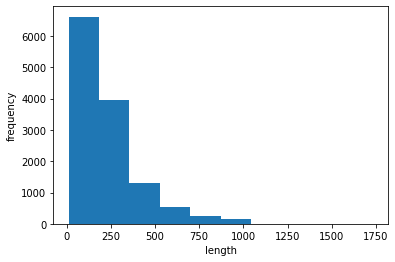

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100,truncating='post',padding='post')

In [ ]:
print(train_seq.shape)
#이차원 배열이 되어 있따!

(12800, 100)


In [ ]:
print(train_seq[0])

[  1  73  89  81  25  60   2   6  20 141  17  14  31 127  12  60  28   2
   2  66  45   6  20  15 497   8  79  17 491   8 112   6   2  20  17   2
   2   4 436  20   9   2   6   2   7 493   2   6 185 250  24  55   2   5
  23 350   7  15  82  24  15   2  66  10  10  45   2  15   4  20   2   8
  30  17   2   5   2  17   2 190   4  20   9  43  32  99   2  18  15   8
 157  46  17   2   4   2   5   2   9  32]


In [ ]:
val_seq = pad_sequences(val_input,maxlen=100)

In [ ]:
#순환 신명망 만들기

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='tanh'))
#input_shape에 입력차원을 (100,500)으로 지정했다.
#첫 번째 차원이 100인 것은 앞에서 샘프르이 길이를 100으로 지정했고
#500은 train_seq와 val_seq의 한가지 큰 문제가 있는데, 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만들기 때문에
#20번 토큰을 10번 토큰보다 더 중요시해야할 이유가 여기에서는 없다. 그래서 각 정수를 고유하게 표현하는 방법 원-핫 코딩을 해야된다.
#예시로 10을 원핫코딩을하면 0000000000100~
#여기서는 500개의 단어만 사용하도록 지정했기 때문에 정숫값의 범위는 0~499까지가 된다.
#순환층에도 당연히 활성화 함수를 사용해야 한다.

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)
#12800개의 문장에 100개의 단어만 뽑아와서 그것을 500개의 원핫코딩으로 만듬

(12800, 100, 500)


In [ ]:
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#순환 신경망 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_oh,train_target,epochs=100,batch_size=64,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
200/200 [==============================] - 10s 41ms/step - loss: 4.3062 - accuracy: 0.5028 - val_loss: 3.8540 - val_accuracy: 0.5072
Epoch 2/100
200/200 [==============================] - 8s 39ms/step - loss: 3.8647 - accuracy: 0.5015 - val_loss: 3.4509 - val_accuracy: 0.5066
Epoch 3/100
200/200 [==============================] - 8s 40ms/step - loss: 3.3969 - accuracy: 0.5037 - val_loss: 3.0599 - val_accuracy: 0.5084
Epoch 4/100
200/200 [==============================] - 8s 40ms/step - loss: 3.0082 - accuracy: 0.5017 - val_loss: 2.5773 - val_accuracy: 0.5069
Epoch 5/100
200/200 [==============================] - 8s 40ms/step - loss: 2.4834 - accuracy: 0.5035 - val_loss: 2.0095 - val_accuracy: 0.5072
Epoch 6/100
200/200 [==============================] - 8s 39ms/step - loss: 1.9252 - accuracy: 0.5027 - val_loss: 1.5705 - val_accuracy: 0.5131
Epoch 7/100
200/200 [==============================] - 8s 40ms/step - loss: 1.5010 - accuracy: 0.5068 - val_loss: 1.3176 - val_accuracy

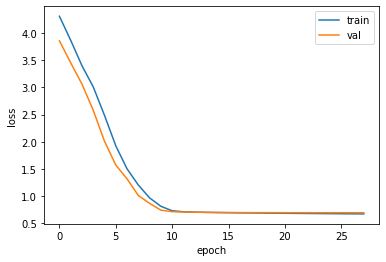

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
##단어 임베딩

#순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법을 **단어 임베딩**이라고 한다.
#차원축소와 비슷하게 각 단어를 고정된 크기의 실수 벡터로 바꾸어준다. 즉 특징을 벡터로 표시

#벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있다.
#딥러닝은 결국 특징을 뽑아내는 거 이기때문에 데이터도 벡터로 특징을 표현하면 훨씬 좋겠쬬?

#이미 케라스에서는 준비되어있다. Emdedding 클래스로 임베딩 기능을 제공한다.
#단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것이다.
#즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 trian_seq를 사용할 수 있다.
#이 때문에 메모리를 훨씬 효율적으로 사용할 수 있다.

#단어 임베딩도 (100,) 크기의 샘플을 (100,20)와 같이 표현 500개의 단어를 단 20개의 벡터의 배열로 표현

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid')) #순환신경망의 출력은 항상 하나다!!
model2.summary()
#여기서 두번째 매개변수 16은 임베딩 벡터의 크기
#16*8 + 은닉상태에서 곱해지는 가중치 8*8 (전의 입력이 다시 반영되기 때문에) + 절편 8 = 200 파라미터는 200개

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
200/200 [==============================] - 6s 27ms/step - loss: 0.6820 - accuracy: 0.5630 - val_loss: 0.6526 - val_accuracy: 0.6453
Epoch 2/100
200/200 [==============================] - 5s 26ms/step - loss: 0.6439 - accuracy: 0.6558 - val_loss: 0.6336 - val_accuracy: 0.6737
Epoch 3/100
200/200 [==============================] - 5s 26ms/step - loss: 0.6263 - accuracy:

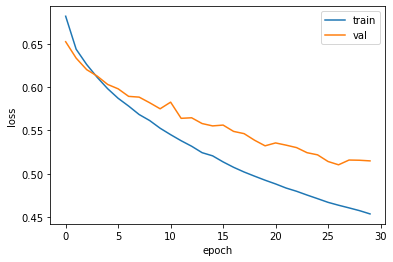

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
#적절히 되었다~!

In [ ]:
###LSTM과 GRU 셀


#이 절에서는 고급 순환층을 공부
#2절에서 배웠던 SimpleRNN보다 계산이 훨씬 복잡함
#하지만 성능이 뛰어나기 때문에 순환 신경망에 많이 채택

#일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어렵다
#시퀀스가 길수록 순환되는 은닉상태에 담긴 정보가 *희석*되기 때문에
#따라서 멀리 떨어져 있는 단어 정보를 인식하는데 어려울 수 있기 때문에 여기서 두개를 배워본다



############LSTM 구조#################
#Long Short-Term Memory의 약자
#말 그대로 단기 기억을 오래 기억하기 위해 고안

#LSTM에는 순환되는 상태가 2개인다.
#은닉상태말고 **셀상태**라고 부르는 값이 또 있다. 은닉상태  = 출력값
#은닉상태와 달리 셀 상태는 다음 층으로 전달되지 않고 LSTM셀에서 순환만 되는 값
#은닉상태를 또 다른 가중치에 곱한다음 시그모이드 함수를 통과시키고, 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만든다.
#셀 상태가 오른쪽에서 tanh함수를 통과하여 새로운 은닉상태를 만드는데 기여

#LSTM은 마치 작은 셀을 여러개 포함하고 있는 큰 셀
#그러니깐 은닉상태와 셀상태가 각각 다른 가중치로 곱해지고 셀 상태는 셀 상에서 머물고
#은닉상태의 출력값을 뽑을때 tanh를 통과해서 은닉상태에서 활성화함수를 통과한 값과 곱한 후 이전ㄴ 셀 상태와 더한다.

#최종결과는 방금이 삭제게이트고 입력게이트가 추가되고 tanh함수로 나가는게 출력게이트이다. 삭제 입력 게이트 곱해지고 tanh로 나온다.


##LSTM 신경망 훈련하기

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size = 0.2,random_state=42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100,truncating='post',padding='post')
val_seq = pad_sequences(val_input,maxlen=100,truncating='post',padding='post')

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()
#방금 파라미터가 200개 였지만 여기서 800개가 되었다!!

17473536/17464789 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 21ms/step - loss: 0.6927 - accuracy: 0.5247 - val_loss: 0.6923 - val_accuracy: 0.5284
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6915 - accuracy: 0.5476 - val_loss: 0.6907 - val_accuracy: 0.5398
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6874 - accuracy: 0.5779 - val_loss: 0.6805 - val_accuracy: 0.5900
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6560 - accuracy: 0.6571 - val_loss: 0.6355 - val_accuracy: 0.6864
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6215 - accuracy: 0.6989 - val_loss: 0.6154 - val_accuracy: 0.7090
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6032 - accuracy: 0.7176 - val_loss: 0.6004 - val_accuracy: 0.7162
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5874 - accuracy: 0.7273 - val_loss: 0.5876 - val_accuracy

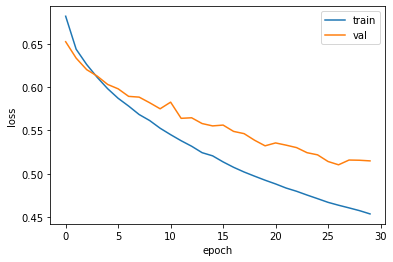

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
#뭐 책에서는 과대 접합이 줄어든다고 나왔다
#idbm 에서 지금 데이터가 바뀌었나보다


In [ ]:
##순환층에 드롭아웃 적용하기
#완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해 드롭아웃을 적용
#순환층은 자체적으로 드롭아웃 기능을 제공. SimpleRNN 과 LSTM 클래스 모두 dropout변수와 recurrent_dropout매개변수를 가지고 있다.

#dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉상태에 드롭아웃을 적용
#하지만 기술적인 문제로 인해 recurrnet_dtopout을 사용하면 GPU를 사용하여 모델을 훈현하지 못한다.

#이 때문에 모델의 훈련속도가 크게 느려진다.
#따라서 여기선 dropout만 사용

#dropout 매개변수를 0.3으로 지정하여 30%입력을 드롭아웃



from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8,dropout=0.3))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()
#방금 파라미터가 200개 였지만 여기서 800개가 되었다!!

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


NameError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


NameError: ignored